# Reporte 8

Este estudio utiliza la regresión discontinua para examinar los impactos a largo plazo de la mita, un sistema extensivo de trabajo minero forzoso vigente en Perú y Bolivia entre 1573 y 1812. Dicho trabajo forzoso fue establecido por los españoles en la época del Virreinato del Perú, obligando a trabajar a varones en las minas cercanas (como la de Potosí  o Huancavelica). Históricamente, los distritos de mita tenían menos latifundistas y un menor nivel educativo. En la actualidad, están menos integrados en las redes de carreteras y sus residentes tienen muchas más probabilidades de ser agricultores de subsistencia. Entonces, teniendo ello en consideración, la pregunta de investigación del artículo es ¿cuáles son los efectos a largo plazo que tiene la mita, vigente en Perú y Bolivia entre 1573 y 1812, en la actualidad? Como concluirá el autor más adelante, los resultados indican que el efecto de la mita disminuye el consumo de los hogares en alrededor de un 25% y aumenta la prevalencia del retraso en el crecimiento de los niños en alrededor de 6 puntos porcentuales en los distritos sometidos en la actualidad

En primer lugar, una fortaleza es que la autora utiliza un modelo de regresión discontinua (RD), donde, la cual le permitirá abordar la correlación entre su variable de tratamiento, los factores y la variable dependiente. En este, la autora delimita la extensión geográfica de su estudio, enfocándose en la cordillera de los Andes en el sur de Perú donde la altitud, la distribución étnica y otros factores son estadísticamente idénticos. Esta fortaleza además le permite poder utilizar los datos del Imperio español y de la República peruana para rastrear los canales de persistencia institucional. Asimismo, el autor utiliza diversas fuentes de literatura, en donde realiza un revisión histórica y crítica, en donde evalúa los resultados e impactos de la mita, pero también hace uso de data, para poder sustentar sus hipótesis de forma empírica. 

Respecto a las debilidades, como indica la autora al inicio, es que la encuesta realizada a los hogares determinados brinda poca información para la estimación de modelos flexibles. Sin embargo, la magnitud del efecto mita es robusta a una serie de especificaciones alternativas. Además, parte de la data corresponde a estudios bastante antiguos, por lo que existe que suma cierto grado de incertidumbre en los resultados.

En suma, la investigación en cuestión resulta ser un avance respecto a investigaciones previas sobre la mita minera en los resultados puesto que logra confirmar a través de resultados la hipótesis presentada al principio acerca de que las instituciones extractivas históricas influyen en la prosperidad económica a largo plazo. Esta comprobación, a diferencia de otras planteadas previamente, se establece a través de un modelo de regresión (de forma empírica), mientras que otras hipótesis previas respecto a los efectos de la mita se sostenían en datos históricos.  Asimismo, la metodología empleada permitió mostrar los principales resultados obtenidos a partir de la réplica. Cuyos resultados explican que el impacto de la mita minera en la era colonial, ha tenido efectos negativos a largo plazo sobre el consumo en los hogares y en el crecimiento de niños y niñas. Asimismo, analiza los canales de persistencia a través de los cuales la mita produjo los efectos antes mencionados.

Entonces, los siguientes pasos para seguir en la investigación podrían ser utilizar los mismos datos que la autora ya ha desarrollado para poder plantear más hipótesis. Es decir, trata de ver otros efectos que puede haber tenido la mita utilizando diferentes factores de correlación. Además, al haber sido la mita establecida en gran parte de los sectores donde los españoles obligaron al trabajo forzado, se propondría realizar un estudio similar en diferentes países de la región, para poder comparar los resultados obtenidos y verificar si los impactos han sido similares o no. En caso los resultados no seas similares, se podría plantear qué factores delimitaron que el impacto sea mayor o menor. 

**CÓDIGO**

Realizado con Alejandra Boceta Palomino

**Instrumental Variables**

*Supuesto de Relevancia:* El instrumento ("Z"), debe podere explicar parte del tratamiento ("X"). Entonces, cuanto más fuerte sea la correlación entre "Z" y "X", más confianza tendrá en la suposición de relevancia y menos saltará la estimación de una muestra a otra. 

Entonces, también se debe mencionar que las variables instrumentales buscan responder para cada Z-movimiento explicado en Z, cuánto Z-movimiento explicado en Y. O, en otras palabras, $Cov(Z,Y)/Cov(Z,X)$

.

*Supuesto de Validez:*La validez es la suposición de que el instrumento es una variable que no tiene puertas traseras abiertas propias.  Es decir, cualquier camino entre el instrumento $Z$ el resultado $Y$ debe pasar por el tratamiento $X$ o estar cerrado. En otras palabras, es una suposición de que $Z$ puede ser razonablemente excluida del modelo $Y$ después de que la ruta $Z\rightarrow X$ está incluida.

In [5]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
# pip install causalgraphicalmodels
# pip install linearmodels

from causalgraphicalmodels import CausalGraphicalModel
import os
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns

**Ploteo de Histogramas**

Tomando en cuenta que la variable $nearc4$ representa si existe un college en el county debe realizar los siguientes ploteos de histogramas.

- Grafique dos histogramas para la variable años de educación educ para cuando nearc4 == 1, y cuando nearc4 == 0. Compare y describa los patrones que encuentra.


In [9]:
# load data

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


In [10]:
card.groupby(["nearc4"]).mean()

,id,nearc2,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,step14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
nearc4,,,,,,,,,,,,,,,,,,,,,
0.0,3489.990479,0.354232,12.698014,27.927900,9.221606,9.939687,297838.62500,0.788924,0.095089,0.040752,...,31.515345,100.610649,2.222689,0.549634,9.229885,6.155494,103.509926,-0.021442,6.176936,-0.163051
1.0,2158.374512,0.481247,13.527034,28.208963,10.356696,10.533370,332068.21875,0.789576,0.103264,0.037993,...,34.489098,103.206848,2.294003,0.732843,8.681929,6.311401,91.882126,0.009995,6.301406,0.076006


Primer gráfico de Histogramas:

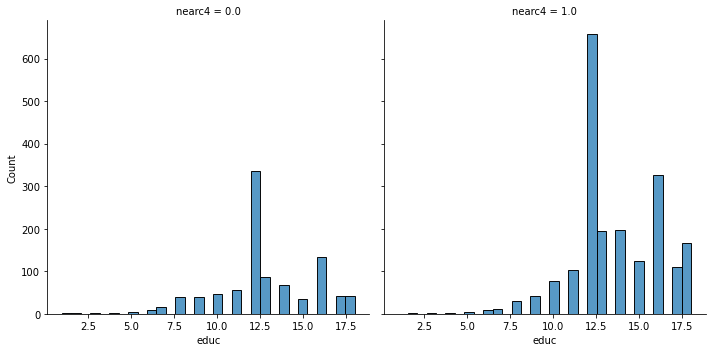

In [13]:
sns.displot(card, x="educ", col="nearc4")

Segundo gráfico de Histogramas para hacer la comparación: 

,id,nearc2,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,step14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
nearc4,,,,,,,,,,,,,,,,,,,,,
0.0,3489.990479,0.354232,12.698014,27.927900,9.221606,9.939687,297838.62500,0.788924,0.095089,0.040752,...,31.515345,100.610649,2.222689,0.549634,9.229885,6.155494,103.509926,-0.021442,6.176936,-0.163051
1.0,2158.374512,0.481247,13.527034,28.208963,10.356696,10.533370,332068.21875,0.789576,0.103264,0.037993,...,34.489098,103.206848,2.294003,0.732843,8.681929,6.311401,91.882126,0.009995,6.301406,0.076006


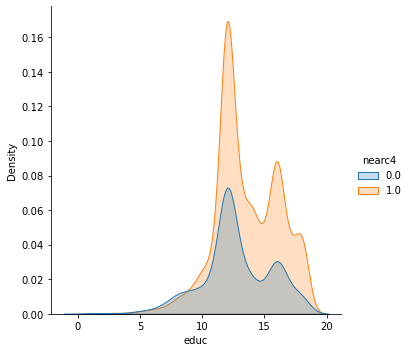

In [17]:
sns.displot(card, x="educ", hue="nearc4", kind="kde", fill=True)
card.groupby(["nearc4"]).mean() #get the nearc4's mean

En los histogramas se puede ver que cuando nearc4 es igual 1 (o sea que sí existe un college en el county), la cantidad de personas que llegan a más años de educación aumenta a más del doble a partir de los 12 años de educación.

Sin embargo, antes de los 10 años de eduación, la variable nearc4 no es tan fuerte respecto a los años de educación de las personas, ya que ambos gráficos siguen una tedencia similar antes de 10 años de educación. 

Asimismo, se puede apreciar que la mayoría de las personas llegan a los 12 años de educación, en donde tenemos un pico para nearc4 igual a 0 o igual a 1.

Asimismo, el área del gráfico naranja (que representa a nearc4==0), es mucho mayor, por lo que la cantidad de personas con dicha condición y que poseen más años de educación es mucho mayor. 

Asimismo, evidenciamos dos picos, donde con condiciones de nearc=4 y nearc=1, se alcanza la mayor densidad de personas con 12 años de educacuón, pero también en 16 años, donde se presenta otro pico de alta densidad. 

- Grafique dos histogramas para la variable años del logaritmos de los ingresos lwage para cuando nearc4 == 1, y cuando nearc4 == 0. Compare y describa los patrones que encuentra.

Primer gráfico de histogramas:

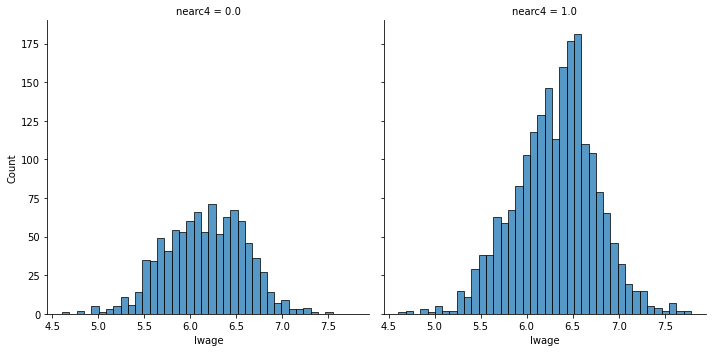

In [20]:
sns.displot(card, x="lwage", col="nearc4")

Segundo gráfico de Histogramas para hacer la comparación: 

,id,nearc2,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,step14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
nearc4,,,,,,,,,,,,,,,,,,,,,
0.0,3489.990479,0.354232,12.698014,27.927900,9.221606,9.939687,297838.62500,0.788924,0.095089,0.040752,...,31.515345,100.610649,2.222689,0.549634,9.229885,6.155494,103.509926,-0.021442,6.176936,-0.163051
1.0,2158.374512,0.481247,13.527034,28.208963,10.356696,10.533370,332068.21875,0.789576,0.103264,0.037993,...,34.489098,103.206848,2.294003,0.732843,8.681929,6.311401,91.882126,0.009995,6.301406,0.076006


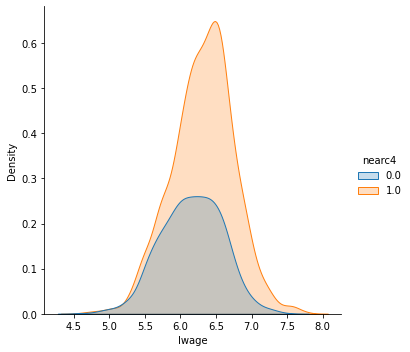

In [21]:
sns.displot(card, x="lwage", hue="nearc4", kind="kde", fill=True)
card.groupby(["nearc4"]).mean() #get the nearc4's mean

En los histogramas se puede ver que cuando nearc4 es igual a 1 ((o sea que sí existe un college en el county)), la cantidad de personas que tienen un salario alto es más del doble, respecto a cuando nearc4 es igual a 0

Además, la población con condición nearc4=1, poseen una población mayor al tener una área mayor. Es decir, el área naranja es mucho más grande que el área azul (con nearc4=0). 


Asimismo, se puede ver una distribución más simétroca a las personas con nearc4 igual a 0.

por otro lado, cuando nearc4 es igual a 1, la distribución de la cantidad de personas es más dispareja, hay una mayor concentración en la mitad de la tabla (hasta antes que el logaritmo sea menor a 6.5). 


**Regresiones**

3. Ahora van a replicar las regresiones que hicimos en clase pero el instrumento Z ya no será ***nearc4*** sino ***nearc2*** .

- Corran una regresion lineal del tipo "lwage ~ educ + exper + black + south + married + smsa", y expliquen los resultados que encuentran.

In [44]:
#OLS
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     219.1
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.69e-232
Time:                        15:03:42   Log-Likelihood:                -1278.7
No. Observations:                3010   AIC:                             2571.
Df Residuals:                    3003   BIC:                             2613.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0642      0.064     79.594      0.000       4.939       5.189
educ           0.0711      0.003     20.439      0.000       0.064       0.078
exper          0.0342      0.002     15.459      0.000       0.030       0.039
black         -0.1654      0.018     -9.408      0.000      -0.200      -0.131
south         -0.1325      0.015     -8.855      0.000      -0.162      -0.103
married       -0.0358      0.003    -10.542      0.000      -0.042      -0.029
smsa           0.1751      0.015     11.338      0.000       0.145       0.205
==============================================================================
Omnibus:                       52.534   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.142
Skew:                          -0.231   Prob(JB):                     1.60e-15
Kurtosis:                       3.575   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Coeficientes de la regresión lineal
print("Coeficientes de la regresión lineal")
print(ols_reg.params)

Coeficientes de la regresión lineal
Intercept    5.064222
educ         0.071124
exper        0.034176
black       -0.165436
south       -0.132467
married     -0.035803
smsa         0.175092
dtype: float64


In [45]:
# There are null values in the dataset, we will fill them with 0
card['married'] = card['married'].fillna(0)

<AxesSubplot:xlabel='nearc2', ylabel='Count'>

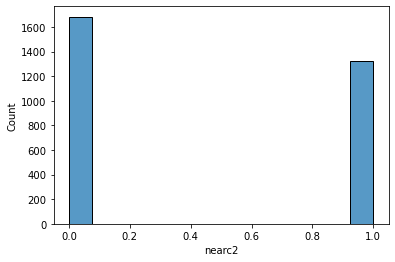

In [46]:
sns.histplot(data=card, x="nearc2")

- Corran una regresion de tipo IV(usando el paquete IV2SLS) donde van a instrumentalizar la variable educ con ***nearc2*** .
La regressión debería tener una forma de este tipo **"lwage ~ 1 + exper + black + south + married + smsa + [educ ~ nearc4 ]"**.
Compare los resultados encontrados en la regresión de arriba. Cambió el coeficiente relacionado a ***educ*** , por qué?

In [47]:
#2SLS
iv_reg = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc2 ]", card).fit()
iv_reg.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                     -1.3114
Estimator:                    IV-2SLS   Adj. R-squared:                -1.3160
No. Observations:                3010   F-statistic:                    289.62
Date:                Sun, Nov 13 2022   P-value (F-stat)                0.0000
Time:                        15:03:43   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.1276     3.1412     0.0406     0.9676     -6.0290      6.2843
black          0.1134     0.1816     0.6244     0.5324     -0.2425      0.4692
exper          0.1515     0.0747     2.0274     0.0426      0.0050      0.2980
married       -0.0151     0.0147    -1.0258     0.3050     -0.0438      0.0137
smsa           0.0201     0.1030     0.1949     0.8455     -0.1819      0.2220
south         -0.0319     0.0692    -0.4603     0.6453     -0.1675      0.1038
educ           0.3618     0.1849     1.9562     0.0504     -0.0007      0.7243
==============================================================================

Endogenous: educ
Instruments: nearc2
Robust Covariance (Heteroskedastic)
Debiased: False
"""

In [53]:
# Coeficientes de la regresión de tipo IV
print("Coeficientes de la regresión de tipo IV")
print(iv_reg.params)

Coeficientes de la regresión de tipo IV
Intercept    0.127624
black        0.113361
exper        0.151502
married     -0.015058
smsa         0.020083
south       -0.031859
educ         0.361797
Name: parameter, dtype: float64


***Conclusión***:

- En primer lugar, se presentan los resultados de la prueba OLS. Por cada año adicional de escolarización, los ingresos de los encuestados aumentan aproximadamente un 7,1%. 

 **Luego de instrumentalizar la variable "educ", se corre una regresion de tipo IV(usando el paquete IV2SLS):***

- A continuación, estimamos los 2SLS. Aquí encontramos un rendimiento de la escolarización mucho mayor que el que habíamos encontrado utilizando OLS. El estadístico F es superior a 15, lo que sugiere que no tenemos un problema de instrumento débil. El rendimiento de la escolarización asociado a esta estimación 2SLS es de 0,361, es decir, por cada año adicional de escolarización, los ingresos aumentan un 36,1%.

- Finalmente, el cambio del coeficiente se debe a la instrumentalización de la variable $educ$
- Asimismo, se enumeran otras covariables en casos sea necesario estudiarlas también.
